In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow import keras
import tensorflow as tf
from datetime import datetime

2022-11-15 16:48:16.414094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = read_csv("folder/subfolder/out_5min.csv",
                 #  parse_dates={'dt' : ['Time']},
                   infer_datetime_format=True, 
                   index_col= 0,
                   na_values=['nan','?'],sep=";")
dataset.fillna(0, inplace=True)
values = dataset.values
# ensure all data is float
values = values.astype('float32')

In [3]:
dataset.head(4)

,ms,dz,go,mi,fco2_HQ,fco2_MQ,fco2_raw,glwody,T50cm,T2m,...,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
rok,,,,,,,,,,,,,,,,,,,,,
2013,1,1,0,4,0.0,0.0,0.0,0.0,1.4,1.8,...,0.7,249.2,322.7,999.0,2.7,204.0,0.6,0.785,0.0,0.0
2013,1,1,0,9,0.0,0.0,0.0,0.0,1.3,1.7,...,0.8,249.2,322.7,999.0,2.9,202.8,0.6,0.785,0.0,0.0
2013,1,1,0,14,0.0,0.0,0.0,0.0,1.2,1.6,...,0.9,249.3,322.8,999.1,3.0,206.5,0.6,0.785,0.0,0.0
2013,1,1,0,19,0.0,0.0,0.0,0.0,1.2,1.6,...,1.1,249.3,322.8,999.0,3.2,208.6,0.6,0.785,0.0,0.0


In [4]:
dataset.drop(columns  = [ 'dz','go','ms','mi'], inplace = True)

In [5]:
dataset.head()

,fco2_HQ,fco2_MQ,fco2_raw,glwody,T50cm,T2m,Kd,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
rok,,,,,,,,,,,,,,,,,
2013,0.0,0.0,0.0,0.0,1.4,1.8,0.0,0.7,249.2,322.7,999.0,2.7,204.0,0.6,0.785,0.0,0.0
2013,0.0,0.0,0.0,0.0,1.3,1.7,0.0,0.8,249.2,322.7,999.0,2.9,202.8,0.6,0.785,0.0,0.0
2013,0.0,0.0,0.0,0.0,1.2,1.6,0.0,0.9,249.3,322.8,999.1,3.0,206.5,0.6,0.785,0.0,0.0
2013,0.0,0.0,0.0,0.0,1.2,1.6,0.0,1.1,249.3,322.8,999.0,3.2,208.6,0.6,0.785,0.0,0.0
2013,0.0,0.0,0.0,0.0,1.2,1.6,0.0,1.1,249.3,322.9,998.7,3.5,207.2,0.6,0.785,0.0,0.0


In [6]:
dataset.drop(columns =[] , inplace = True)

In [7]:
#final dataset
dataset.head(2220)

,fco2_HQ,fco2_MQ,fco2_raw,glwody,T50cm,T2m,Kd,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
rok,,,,,,,,,,,,,,,,,
2013,0.0,0.0,0.0,0.0,1.4,1.8,0.0,0.7,249.2,322.7,999.0,2.7,204.0,0.6,0.785,0.0,0.0
2013,0.0,0.0,0.0,0.0,1.3,1.7,0.0,0.8,249.2,322.7,999.0,2.9,202.8,0.6,0.785,0.0,0.0
2013,0.0,0.0,0.0,0.0,1.2,1.6,0.0,0.9,249.3,322.8,999.1,3.0,206.5,0.6,0.785,0.0,0.0
2013,0.0,0.0,0.0,0.0,1.2,1.6,0.0,1.1,249.3,322.8,999.0,3.2,208.6,0.6,0.785,0.0,0.0
2013,0.0,0.0,0.0,0.0,1.2,1.6,0.0,1.1,249.3,322.9,998.7,3.5,207.2,0.6,0.785,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,0.0,0.0,0.0,4.7,-4.9,-5.1,0.0,0.6,276.1,299.3,1010.4,2.4,207.4,0.7,0.780,0.0,0.0
2013,0.0,0.0,0.0,4.7,-4.9,-5.1,0.0,0.6,275.9,299.3,1010.1,2.2,207.4,0.7,0.780,0.0,0.0
2013,0.0,0.0,0.0,4.7,-4.9,-5.1,0.0,0.7,273.2,299.2,1009.8,2.5,207.4,0.7,0.780,0.0,0.0


In [8]:
values = dataset.values
# ensure all data is float
values = values.astype('float32')

In [9]:
# normalizing input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled =pd.DataFrame(scaled)

In [10]:
scaled.head(2220)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.593303,0.595949,0.491794,0.821062,0.422222,0.428826,0.0,0.001195,0.318467,0.347270,0.495133,0.221311,0.566667,0.045045,0.795009,0.0,0.0
1,0.593303,0.595949,0.491794,0.821062,0.420513,0.427046,0.0,0.001366,0.318467,0.347270,0.495133,0.237705,0.563333,0.045045,0.795009,0.0,0.0
2,0.593303,0.595949,0.491794,0.821062,0.418803,0.425267,0.0,0.001537,0.318781,0.347582,0.496349,0.245902,0.573611,0.045045,0.795009,0.0,0.0
3,0.593303,0.595949,0.491794,0.821062,0.418803,0.425267,0.0,0.001878,0.318781,0.347582,0.495133,0.262295,0.579444,0.045045,0.795009,0.0,0.0
4,0.593303,0.595949,0.491794,0.821062,0.418803,0.425267,0.0,0.001878,0.318781,0.347894,0.491484,0.286885,0.575556,0.045045,0.795009,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,0.593303,0.595949,0.491794,0.864865,0.314530,0.306050,0.0,0.001024,0.402952,0.274259,0.633820,0.196721,0.576111,0.049550,0.786096,0.0,0.0
2216,0.593303,0.595949,0.491794,0.864865,0.314530,0.306050,0.0,0.001024,0.402324,0.274259,0.630170,0.180328,0.576111,0.049550,0.786096,0.0,0.0
2217,0.593303,0.595949,0.491794,0.864865,0.314530,0.306050,0.0,0.001195,0.393844,0.273947,0.626520,0.204918,0.576111,0.049550,0.786096,0.0,0.0
2218,0.593303,0.595949,0.491794,0.864865,0.312821,0.306050,0.0,0.001195,0.377513,0.273011,0.625304,0.213115,0.576111,0.049550,0.786096,0.0,0.0


In [11]:
def create_ts_data(dataset, lookback=1, predicted_col=2):
    temp=dataset.copy()
    temp["id"]= range(1, len(temp)+1)
    temp = temp.iloc[:-lookback, :]
    temp.set_index('id', inplace =True)
    predicted_value=dataset.copy()
    predicted_value = predicted_value.iloc[lookback:,predicted_col]
    predicted_value.columns=["Predcited"]
    predicted_value= pd.DataFrame(predicted_value)
    
    predicted_value["id"]= range(1, len(predicted_value)+1)
    predicted_value.set_index('id', inplace =True)
    final_df= pd.concat([temp, predicted_value], axis=1)
    #final_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)','var1(t)']
    #final_df.set_index('Date', inplace=True)
    return final_df

In [12]:
#We now create the time series dataset with looking back one time step

reframed_df= create_ts_data(scaled, 1,2)
reframed_df.fillna(0, inplace=True)

reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)','var6(t-1)','var7(t-1)','var8(t-1)','var9(t-1)','var10(t-1)','var11(t-1)','var12(t-1)','var13(t-1)','var14(t-1)','var15(t-1)','var16(t-1)','var17(t-1)','var18(t-1)'] 

In [13]:
# split into train and test sets
values = reframed_df.values
training_sample =int( len(dataset) *0.75)
train = values[:training_sample, :]
test = values[training_sample:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [14]:
# reshape input to be 3D [samples, time steps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(394416, 1, 17) (394416,) (131469, 1, 17) (131469,)


In [15]:
#model_gru = Sequential()
#model_gru.add(GRU(85, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
#model_gru.add(GRU(units=32, return_sequences=True))
#model_gru.add(GRU(units=32))
#model_gru.add(Dense(units=1))

#model_gru.compile(loss='mae', optimizer='adam')

In [26]:
model_gru = keras.Sequential([
    keras.layers.GRU(85, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(units=36, return_sequences=True),
    keras.layers.GRU(units=36, return_sequences=True),
    keras.layers.Dense(units=1)
])
model_gru.compile(loss='mae', optimizer='adam')

In [27]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 1, 85)             26520     
                                                                 
 gru_10 (GRU)                (None, 1, 36)             13284     
                                                                 
 gru_11 (GRU)                (None, 1, 36)             7992      
                                                                 
 dense_3 (Dense)             (None, 1, 3)              111       
                                                                 
Total params: 47,907
Trainable params: 47,907
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=10,validation_data=(test_X, test_y), batch_size=64, shuffle=False)

Epoch 1/10
6163/6163 [==============================] - 51s 7ms/step - loss: 0.0062 - val_loss: 0.0067
Epoch 2/10
6163/6163 [==============================] - 45s 7ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 3/10
6163/6163 [==============================] - 42s 7ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 4/10
6163/6163 [==============================] - 46s 7ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 5/10
6163/6163 [==============================] - 42s 7ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 6/10
6163/6163 [==============================] - 48s 8ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 7/10
6163/6163 [==============================] - 41s 7ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 8/10
6163/6163 [==============================] - 40s 6ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 9/10
6163/6163 [==============================] - 40s 7ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 10/10
6163/6163 [==============================] - 45s 7ms/step - l

In [21]:
pred_y =  model_gru.predict(test_X)

4109/4109 [==============================] - 11s 3ms/step


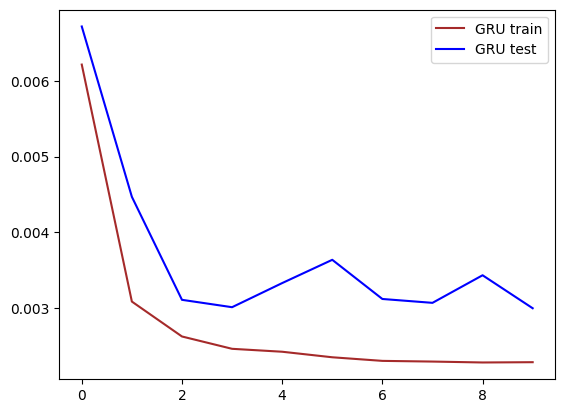

In [22]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
pyplot.legend()
pyplot.show()

In [23]:
test_y.reshape(105177,1)
#test_y.reshape(2627,1)

ValueError: cannot reshape array of size 131469 into shape (105177,1)

In [ ]:
pred_y

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5)

from sklearn.metrics import *
from math import sqrt

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
#over small part of data
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
#over very small part of data
plt.plot(tes[:500], label = 'Actual')
plt.plot(fp[:500], label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
plt.plot(scaled[3], label = 'Actual')

In [ ]:
plt.plot(scaled[2], label = 'Actual')

In [ ]:
plt.plot(scaled[1], label = 'Actual')

In [ ]:
plt.plot(scaled[0], label = 'Actual')